# Analysis Project: Morphology Analysis Random

In [1]:
#Import necessary functions
import csv
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline

#Makes a white backround with gray horizontal gridmarks at y-values
sns.set_style("whitegrid")

In [2]:
#ps = patch_seq csv file
ps = pd.read_csv("patch_seq_log_mouse.csv")

In [3]:
#list_initial = list with specific columns used from csv file
list_initial = ["Date", "User", "Rig #", "Morph", "Time spent extracting cytosol", "Time spent retracting pipette", 
                "patch duration", "PCR cycles", "SM_QC_PF", "Bad dates"]
ps = ps[list_initial]
ps.head()

,Date,User,Rig #,Morph,Time spent extracting cytosol,Time spent retracting pipette,patch duration,PCR cycles,SM_QC_PF,Bad dates
0,170104,P1,5,n,2.3,NaN,11.78333333,18.0,pass,x
1,170104,P1,5,n,2.316666667,NaN,12.21666667,18.0,pass,x
2,170104,P1,5,n,2.45,NaN,11.78333333,18.0,pass,x
3,170104,P1,5,n,2.316666667,NaN,12.45,18.0,pass,x
4,170104,P1,5,y,2.35,NaN,12.36666667,18.0,pass,x


### Categorizing & Filtering the columns

In [4]:
#Changing Date Format
ps["Date"] = pd.to_datetime(ps["Date"], format = "%y%m%d", errors = "coerce")

#Changing String to Numerical
ps["Time spent extracting cytosol"] = pd.to_numeric(ps["Time spent extracting cytosol"].str.replace(' ',''), errors ='coerce')
ps["patch duration"] = pd.to_numeric(ps["patch duration"].str.replace(' ',''), errors ='coerce')
ps["Time spent retracting pipette"] = pd.to_numeric(ps["Time spent retracting pipette"].str.replace(' ',''), errors ='coerce')

#Categories
ps["User"] = ps["User"].astype("category")
ps["Rig #"] = ps["Rig #"].astype("category")
ps["Morph"] = ps["Morph"].astype("category")
ps["PCR cycles"] = ps["PCR cycles"].astype("category")
ps["SM_QC_PF"] = ps["SM_QC_PF"].astype("category")
ps["Bad dates"] = ps["Bad dates"].astype("category")

#Filtering Columns
ps = ps[ps["PCR cycles"] == 21]      #Shows 21 pcr cycles
ps = ps[ps["SM_QC_PF"] != "cnt"]     #Shows everything except (cnt = control)
ps = ps[ps["Bad dates"] != "x"]      #Shows everthing except (x = contaminated)
ps = ps[ps["Time spent extracting cytosol"] <= 10]

#Dropping blank columns
ps = ps.drop("Bad dates", 1)
ps["Time spent retracting pipette"] = ps["Time spent retracting pipette"].fillna(0)
ps.dropna(subset = ["User", "Morph", "Time spent extracting cytosol", "Time spent retracting pipette", "patch duration", 
                    "SM_QC_PF"], inplace = True)
ps.head()

,Date,User,Rig #,Morph,Time spent extracting cytosol,Time spent retracting pipette,patch duration,PCR cycles,SM_QC_PF
1634,2017-04-19,P2,6,n,1.800000,0.0,4.333333,21.0,fail
1635,2017-04-19,P2,6,y,1.666667,0.0,6.566667,21.0,pass
1636,2017-04-19,P2,6,n,1.433333,0.0,8.033333,21.0,fail
1637,2017-04-19,P2,6,y,2.350000,0.0,7.416667,21.0,pass
1638,2017-04-19,P2,6,y,2.216667,0.0,4.166667,21.0,pass


## Creating Recording Duration Column

In [5]:
ps["Recording Duration"] = ps["patch duration"] - ps["Time spent extracting cytosol"] - ps["Time spent retracting pipette"]
ps = ps[ps["Recording Duration"] > 0] #Only shows postive values
ps.head()

,Date,User,Rig #,Morph,Time spent extracting cytosol,Time spent retracting pipette,patch duration,PCR cycles,SM_QC_PF,Recording Duration
1634,2017-04-19,P2,6,n,1.800000,0.0,4.333333,21.0,fail,2.533333
1635,2017-04-19,P2,6,y,1.666667,0.0,6.566667,21.0,pass,4.900000
1636,2017-04-19,P2,6,n,1.433333,0.0,8.033333,21.0,fail,6.600000
1637,2017-04-19,P2,6,y,2.350000,0.0,7.416667,21.0,pass,5.066667
1638,2017-04-19,P2,6,y,2.216667,0.0,4.166667,21.0,pass,1.950000


In [6]:
ps.tail()

,Date,User,Rig #,Morph,Time spent extracting cytosol,Time spent retracting pipette,patch duration,PCR cycles,SM_QC_PF,Recording Duration
4893,2017-12-15,PB,3,n,1.233333,0.000000,5.166667,21.0,pass,3.933333
4894,2017-12-15,P6,2,check with aaron,1.233333,2.366667,6.416667,21.0,pass,2.816667
4895,2017-12-15,P6,2,y,1.316667,2.100000,6.866667,21.0,fail,3.450000
4896,2017-12-15,P6,2,n,1.083333,2.616667,7.033333,21.0,pass,3.333333
4897,2017-12-15,P6,2,y,1.400000,1.650000,7.400000,21.0,pass,4.350000


## Renaming columns

In [7]:
ps.rename(columns = {"Time spent extracting cytosol" : "Extraction Duration", 
                     "Time spent retracting pipette" : "Retraction Duration",
                     "patch duration" : "Patch Duration"}, inplace = True)
ps.head()

,Date,User,Rig #,Morph,Extraction Duration,Retraction Duration,Patch Duration,PCR cycles,SM_QC_PF,Recording Duration
1634,2017-04-19,P2,6,n,1.800000,0.0,4.333333,21.0,fail,2.533333
1635,2017-04-19,P2,6,y,1.666667,0.0,6.566667,21.0,pass,4.900000
1636,2017-04-19,P2,6,n,1.433333,0.0,8.033333,21.0,fail,6.600000
1637,2017-04-19,P2,6,y,2.350000,0.0,7.416667,21.0,pass,5.066667
1638,2017-04-19,P2,6,y,2.216667,0.0,4.166667,21.0,pass,1.950000


## Info 

In [8]:
ps.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2098 entries, 1634 to 4897
Data columns (total 10 columns):
Date                   2098 non-null datetime64[ns]
User                   2098 non-null category
Rig #                  2086 non-null category
Morph                  2098 non-null category
Extraction Duration    2098 non-null float64
Retraction Duration    2098 non-null float64
Patch Duration         2098 non-null float64
PCR cycles             2098 non-null category
SM_QC_PF               2098 non-null category
Recording Duration     2098 non-null float64
dtypes: category(5), datetime64[ns](1), float64(4)
memory usage: 110.0 KB


In [9]:
ps.Morph.value_counts()

n                   1182
y                    491
q                    348
na                    59
processing            10
z                      4
?                      2
t                      1
check with aaron       1
                       0
Name: Morph, dtype: int64

In [10]:
#Users = P1(Kristen), P2(Rusty), P8(Lindsay), P9(Lisa), PA(Ram), PB(Dijon)
#Data: 4/19/2017-12/15/2017

In [11]:
#Info on how to use plots
#order = [list] 
##You can choose the order of subcategories
##Include/not include the ones to display in plot by order
#hue = "string"
##You can choose subcategory to display with x or y axis 
#hue_order = [list]
##You can order the hue, same way as order but you order the hue

Text(0,0.5,u'Extraction Duration (min)')

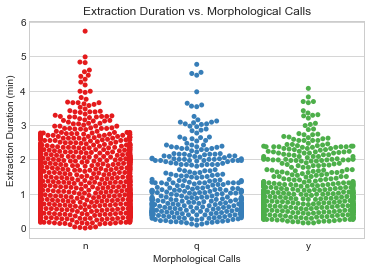

In [12]:
sp = sns.swarmplot(x = "Morph", y = "Extraction Duration", data = ps, order = ["n", "q", "y"],
                   palette = "Set1").set_title("Extraction Duration vs. Morphological Calls")
plt.xlabel("Morphological Calls")
plt.ylabel("Extraction Duration (min)")

Text(0,0.5,u'Retraction Duration (min)')

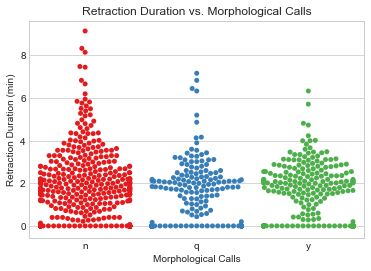

In [13]:
sp = sns.swarmplot(x = "Morph", y = "Retraction Duration", data = ps, order = ["n", "q", "y"],
                   palette = "Set1").set_title("Retraction Duration vs. Morphological Calls")
plt.xlabel("Morphological Calls")
plt.ylabel("Retraction Duration (min)")

Text(0,0.5,u'Recording Duration (min)')

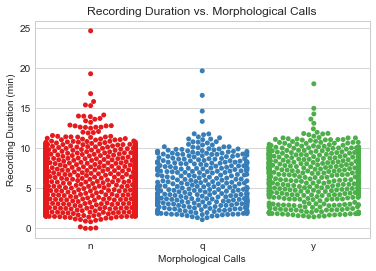

In [14]:
sp = sns.swarmplot(x = "Morph", y = "Recording Duration", data = ps, order = ["n", "q", "y"],
                   palette = "Set1").set_title("Recording Duration vs. Morphological Calls")
plt.xlabel("Morphological Calls")
plt.ylabel("Recording Duration (min)")

## Trial & Error Section, trying to get Morph calls for each user

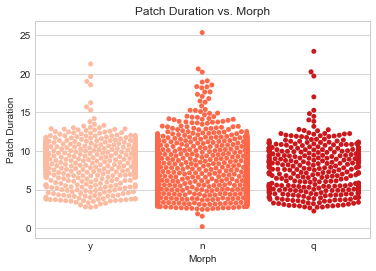

In [15]:
sp = sns.swarmplot(x = "Morph", y = "Patch Duration", data = ps, 
                   order = ["y", "n", "q"], palette = "Reds").set_title("Patch Duration vs. Morph")

Text(0.5,1,u'Count vs. Morph')

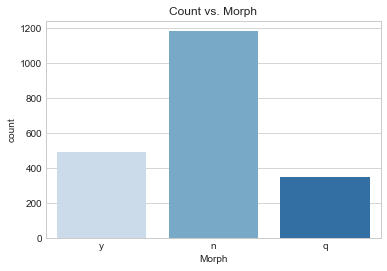

In [16]:
sns.countplot(x = "Morph", data = ps, order = ["y", "n", "q"], palette = "Blues").set_title("Count vs. Morph")

Text(0.5,1,u'Count vs. User')

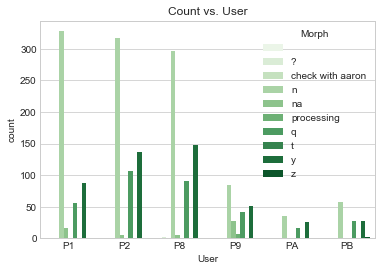

In [17]:
sns.countplot(x = "User", hue = "Morph", data = ps, 
              order = ["P1", "P2", "P8", "P9", "PA", "PB"], palette = "Greens").set_title("Count vs. User")

Text(0.5,1,u'Count vs. Morph')

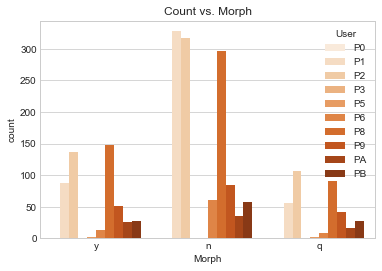

In [18]:
sns.countplot(x = "Morph", hue = "User", data = ps, order = ["y", "n", "q"], palette = "Oranges").set_title("Count vs. Morph")

## Plot: Count of Morphology for each User

Text(0,0.5,u'Count of Morphological Calls')

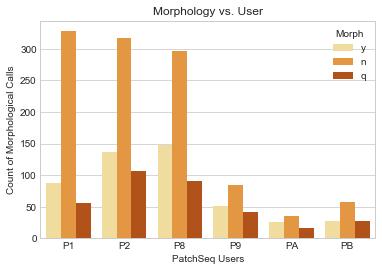

In [19]:
#Use this plot as basis for this file
sns.countplot(x = "User", hue = "Morph", data = ps, order = ["P1", "P2", "P8", "P9", "PA", "PB"], 
              hue_order = ["y", "n", "q"], palette = "YlOrBr").set_title("Morphology vs. User")
plt.xlabel("PatchSeq Users")
plt.ylabel("Count of Morphological Calls")

## Pivot table and groupby 

In [20]:
ps1 = ps[(ps["Morph"] == "y") | (ps["Morph"] == "n") | (ps["Morph"] == "q")]
ps2 = ps1[["User", "Morph", "Rig #"]].rename(columns = {"Rig #" : "Counts"})
ps3 = ps2.groupby(["User", "Morph"]).size().reset_index(name = "Count")
ps3

,User,Morph,Count
0,P1,n,328
1,P1,q,56
2,P1,y,88
3,P2,n,318
4,P2,q,107
5,P2,y,136
6,P5,n,1
7,P5,q,2
8,P5,y,2
9,P6,n,61


In [21]:
ps4 = ps3.rename(columns = {"Morph" : ""})
ps4.head()

,User,,Count
0,P1,n,328
1,P1,q,56
2,P1,y,88
3,P2,n,318
4,P2,q,107


In [22]:
ps5 = ps4.pivot_table(values = [""], index = ["User"], columns = [""], aggfunc = "sum")
ps5.fillna(0, inplace = True)
ps5

Count              
          n      q      y
User                     
P0      0.0    0.0    0.0
P1    328.0   56.0   88.0
P2    318.0  107.0  136.0
P3      0.0    0.0    0.0
P5      1.0    2.0    2.0
P6     61.0    8.0   13.0
P8    296.0   90.0  148.0
P9     84.0   42.0   51.0
PA     36.0   16.0   26.0
PB     58.0   27.0   27.0

In [23]:
#Create a pivot table, groupby
#Sum the counts 
#

# Miscellanous Plots: Possible ideas for something else

## Swarmplot, Violinplot & Boxplot of Patch Duration vs User

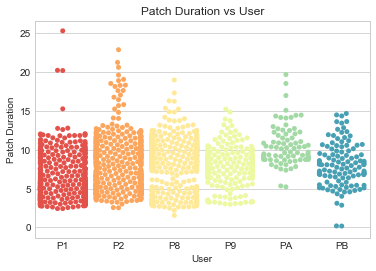

In [24]:
sp = sns.swarmplot(x = "User", y = "Patch Duration", data = ps, 
                   order = ["P1", "P2", "P8", "P9", "PA", "PB"], 
                   palette = "Spectral").set_title("Patch Duration vs User")

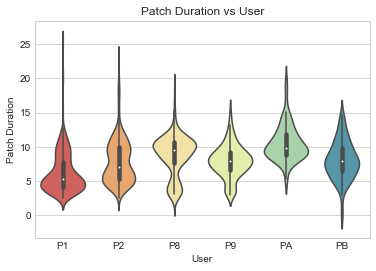

In [25]:
vp = sns.violinplot(x = "User", y = "Patch Duration", data = ps, 
                    order = ["P1", "P2", "P8", "P9", "PA", "PB"], 
                    palette = "Spectral").set_title("Patch Duration vs User")

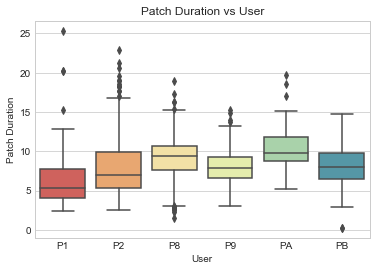

In [26]:
bp = sns.boxplot(x = "User", y = "Patch Duration", data = ps, 
                 order = ["P1", "P2", "P8", "P9", "PA", "PB"], 
                 palette = "Spectral").set_title("Patch Duration vs User")

## Swarmplot, Violinplot & Boxplot of Recording Duration vs User

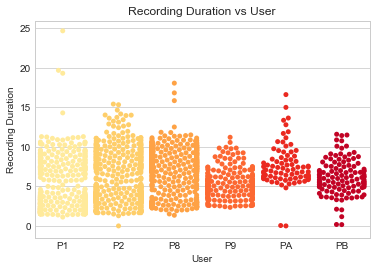

In [27]:
sp = sns.swarmplot(x = "User", y = "Recording Duration", data = ps,
                   order = ["P1", "P2", "P8", "P9", "PA", "PB"], 
                   palette = "YlOrRd").set_title("Recording Duration vs User")

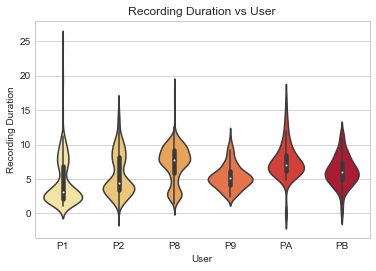

In [28]:
vp = sns.violinplot(x = "User", y = "Recording Duration", data = ps, 
                    order = ["P1", "P2", "P8", "P9", "PA", "PB"], 
                    palette = "YlOrRd").set_title("Recording Duration vs User")

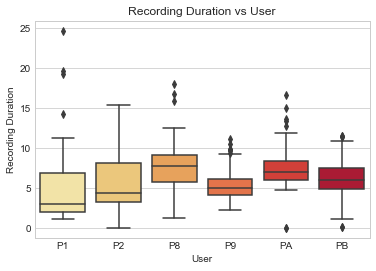

In [29]:
bp = sns.boxplot(x = "User", y = "Recording Duration", data = ps, 
                 order = ["P1", "P2", "P8", "P9", "PA", "PB"], 
                 palette = "YlOrRd").set_title("Recording Duration vs User")

## Swarmplot, Violinplot & Boxplot of Extraction Duration vs User

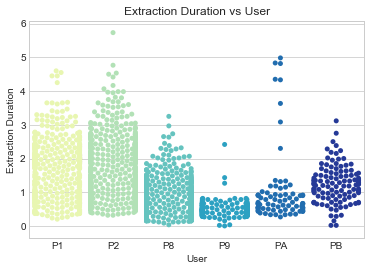

In [30]:
sp = sns.swarmplot(x = "User", y = "Extraction Duration", data = ps,
                   order = ["P1", "P2", "P8", "P9", "PA", "PB"], 
                   palette = "YlGnBu").set_title("Extraction Duration vs User")

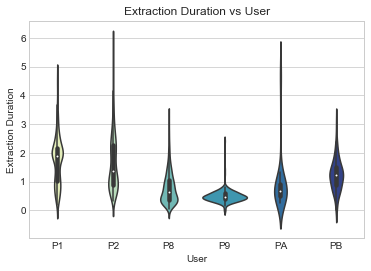

In [31]:
vp = sns.violinplot(x = "User", y = "Extraction Duration", data = ps, 
                    order = ["P1", "P2", "P8", "P9", "PA", "PB"], 
                    palette = "YlGnBu").set_title("Extraction Duration vs User")

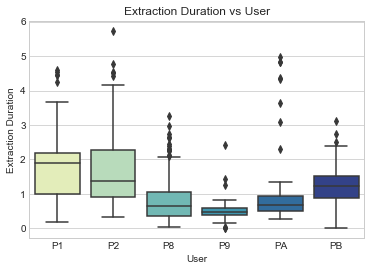

In [32]:
bp = sns.boxplot(x = "User", y = "Extraction Duration", data = ps, 
                 order = ["P1", "P2", "P8", "P9", "PA", "PB"], 
                 palette = "YlGnBu").set_title("Extraction Duration vs User")